# Thyroid Prediction and Classification

. importing pandas library ||
.importing data from drive

In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/DataSets/Thyroid_Disease_Data.csv")
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


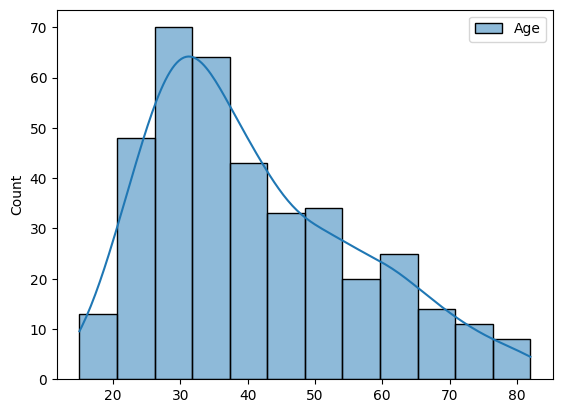

In [ ]:
sns.histplot(data,kde=True)
plt.show()

Renaming columns for no confusion

In [ ]:
print(data.columns,"\n\n","converted to","\n\n")
data.rename(columns={'Hx Smoking':"Smoking_history",
                     'Hx Radiothreapy':"Radiotherapy_history",
                     'Pathology':"Type_of_cancer(Pathology)",
                     'T': 'Tumor',
                     'N': 'Lymph Nodes',
                     'M': 'Cancer Metastasis',
                     'Response' : 'Treatment Response'},inplace=True
            )
data.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object') 

 converted to 




Index(['Age', 'Gender', 'Smoking', 'Smoking_history', 'Radiotherapy_history',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Type_of_cancer(Pathology)', 'Focality', 'Risk', 'Tumor', 'Lymph Nodes',
       'Cancer Metastasis', 'Stage', 'Treatment Response', 'Recurred'],
      dtype='object')

In [ ]:
#Replace The values with a more understandable values
data['Adenopathy'].replace({'No' : 'No Lymp Adenopathy' ,
                          'Left' : 'Left Side Body Adenopathy' ,
                          'Right' : 'Right Side Body Adenopathy' ,
                          'Extensive' : 'Extensive and Widespread'}, inplace = True)


data['Tumor'].replace({'T1a' : 'tumor that is 1 cm or smaller' , 'T1b' : 'tumor larger than 1 cm but not larger than 2 cm' ,
                     'T2' : 'tumor larger than 2 cm but not larger than 4 cm' ,
                     'T3a' : 'tumor larger than 4 cm' ,'T3b' : 'tumor that has grown outside the thyroid' ,
                     'T4a' : 'tumor that has spreaded nearby structures' ,
                     'T4b' : 'tumor that has spreaded nearby structures'} , inplace =True)

data['Lymph Nodes'].replace({'N0' : 'no evidence of regional lymph node metastasis' ,
                     'N1b' : 'regional lymph node metastasis in the central  of the neck' ,
                     'N1a' : 'regional lymph node metastasis in the lateral of the neck'} , inplace =True)

data['Cancer Metastasis'].replace({'M0': 'no evidence of distant metastasis' , 'M1' : 'the presence of distant metastasis'} ,inplace =True )

1. Sanitary check

In [ ]:
data.head()

,Age,Gender,Smoking,Smoking_history,Radiotherapy_history,Thyroid Function,Physical Examination,Adenopathy,Type_of_cancer(Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No Lymp Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No Lymp Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No Lymp Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No Lymp Adenopathy,Micropapillary,Uni-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No Lymp Adenopathy,Micropapillary,Multi-Focal,Low,tumor that is 1 cm or smaller,no evidence of regional lymph node metastasis,no evidence of distant metastasis,I,Excellent,No


In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

# Exploitory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data["Recurred"].rename({"No":0,"Yes":1})
data["Recurred"].head()

0    No
1    No
2    No
3    No
4    No
Name: Recurred, dtype: object

In [ ]:
data=pd.get_dummies(data)
data.head()

,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Smoking_history_No,Smoking_history_Yes,Radiotherapy_history_No,Radiotherapy_history_Yes,Thyroid Function_Clinical Hyperthyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Treatment Response_Biochemical Incomplete,Treatment Response_Excellent,Treatment Response_Indeterminate,Treatment Response_Structural Incomplete,Recurred_No,Recurred_Yes
0,27,True,False,True,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,34,True,False,True,False,False,True,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,30,True,False,True,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,62,True,False,True,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4,62,True,False,True,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False


In [ ]:
new=["16","False","True","False",]

In [ ]:
y=data["Recurred_Yes"]
y1=data["Recurred_No"]
y=pd.concat([y,y1],axis=1)
X=data.drop(["Recurred_Yes","Recurred_No"],axis=1)
# y=data["Recurred"]
# X=data.drop(["Recurred"],axis=1)
print(X.shape)
print(y.shape)

(364, 54)
(364, 2)


Outliers treatment

TTs


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report


# Classifier

In [ ]:
modelclas=RandomForestClassifier(n_estimators=100,random_state=42)
modelclas.fit(X_train, y_train)

y_predclass = modelclas.predict(X_test)

y_predclass=pd.DataFrame(y_predclass)

y_test.rename({"False":0,"True":1})
y_predclass.rename({"False":0,"True":1})


,0,1
0,False,True
1,False,True
2,False,True
3,True,False
4,False,True
...,...,...
68,False,True
69,True,False
70,False,True
71,False,True


In [ ]:
#print(confusion_matrix(y_test, y_predclass))
print(classification_report(y_test, y_predclass))
accuracy = accuracy_score(y_test, y_predclass)
print(">>>>>> accuracy : {:.2f}" .format(accuracy))
correct_predictions = accuracy * len(y_test)
print("Correct predictions:", "{:.0f}/{}".format(correct_predictions, len(y_test)))


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.96      0.98      0.97        51

   micro avg       0.96      0.96      0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73
 samples avg       0.96      0.96      0.96        73

>>>>>> accuracy : 0.96
Correct predictions: 70/73


In [ ]:
print(y_test.shape)
print(y_predclass.shape)

(73, 2)
(73, 2)


In [ ]:
print("Length of data DataFrame:", len(data))
print("Length of y_test:", len(y_test))
print("Length of y_predclass:", len(y_predclass))


Length of data DataFrame: 364
Length of y_test: 73
Length of y_predclass: 73


In [ ]:
def fit_and_evaluate(classifier,classifier_params, X_train, y_train, X_test, y_test):
    model = classifier(**classifier_params)

    model.fit(X_train, y_train)


    y_predclass = model.predict(X_test)


    y_predclass = pd.DataFrame(y_predclass)


    print(classification_report(y_test, y_predclass))


    accuracy = accuracy_score(y_test, y_predclass)

    print(">>>>>> accuracy of ","classsifier"," : {:.2f}" .format(accuracy))

    correct_predictions = accuracy * len(y_test)
    print("Correct predictions:", "{:.0f}/{}".format(correct_predictions, len(y_test)))

# Now, you can use the function with your classifiers and their respective parameters
fit_and_evaluate(RandomForestClassifier,{"n_estimators": 100, "random_state": 42}, X_train, y_train, X_test, y_test)

fit_and_evaluate(XGBClassifier,{}, X_train, y_train, X_test, y_test)
#fit_and_evaluate(LogisticRegression, X_train, y_train, X_test, y_test)
fit_and_evaluate(DecisionTreeClassifier, { "random_state": 42}, X_train, y_train, X_test, y_test)
#fit_and_evaluate(SVC, X_train, y_train, X_test, y_test)
fit_and_evaluate(KNeighborsClassifier,{}, X_train, y_train, X_test, y_test)
#fit_and_evaluate(GaussianNB, X_train, y_train, X_test, y_test)

# And so on...


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.96      0.98      0.97        51

   micro avg       0.96      0.96      0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73
 samples avg       0.96      0.96      0.96        73

>>>>>> accuracy of  classsifier  : 0.96
Correct predictions: 70/73
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.96      0.96      0.96        51

   micro avg       0.95      0.95      0.95        73
   macro avg       0.93      0.93      0.93        73
weighted avg       0.95      0.95      0.95        73
 samples avg       0.95      0.95      0.95        73

>>>>>> accuracy of  classsifier  : 0.95
Correct predictions: 69/73
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      